In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
273465,273465,25798,50621,Does masturbation causes low sperm count?,How can excessive masturbation lead to low spe...,1
90589,90589,151989,151990,What can an individual or a family or a busine...,What can an individual or a family or a busine...,0
36339,36339,66271,66272,Who provides high pressure washing service in ...,Where can I get best pressure washing services...,1
370982,370982,501571,501572,What is yours best performance till date?,How will Donald Trump rebuild NYC's infrastruc...,0
201745,201745,103646,111349,"Who is worse, Trump or Clinton?","Who's worse, Trump or Clinton?",1
282758,282758,402758,402759,"Does the ground refill with dirt, probably due...",Can I grow back the brain cells I probably los...,0
39347,39347,71339,71340,Were Jews black people?,Is the claim that the ancient Egyptians were b...,0
400580,400580,533929,1378,What are the best Photo startups?,What is a good photo?,0
39097,39097,70916,70917,What are the differences between pharmacology ...,What is the best app for pharmacology?,0
45836,45836,82072,82073,How would history be changed if the Japanese h...,What if the Japanese won the Battle of Midway?,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

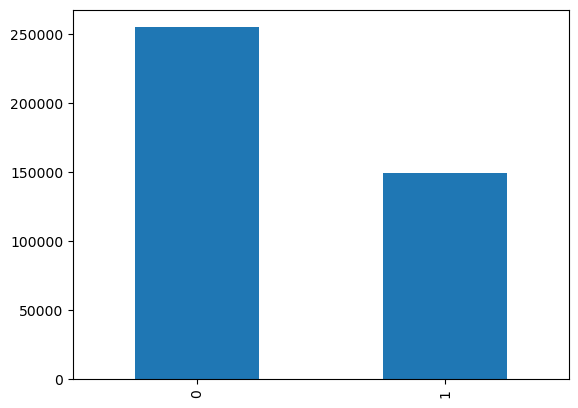

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

# garph analysis -> thora unbalanced hai dataset ek class(0) ki trf jada juka hua h 

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


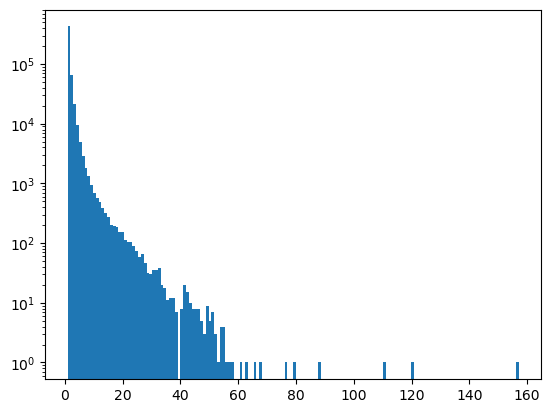

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()